In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv("/content/Second Dataset.csv")

In [ ]:
data

,Bank,ROE,ROA,EPS,NPG,IGR,PEG,PE,OCF
0,Arab Bank,7.72,1.36,1.09,-2.71,4.17,5.10,-2.71,182.14
1,ABC Bank,-2.78,-0.38,-0.04,-146.79,-0.60,-2.05,-146.79,-66.76
2,Bank of Jordan,8.96,1.34,0.18,-1.34,4.27,0.25,-1.35,-431.41
3,Cairo Amman Bank,11.54,1.29,0.21,14.29,6.76,-1.47,8.27,1549.76
4,Capital Bank,7.07,0.95,0.10,38.43,8.31,6.94,38.44,-42.19
5,Commercial Bank,6.00,0.59,0.07,-20.41,2.17,4.59,-20.41,-70.61
6,Jordan Kuwait Bank,3.86,0.63,0.17,-49.10,0.05,4.15,-49.10,338.18
7,National Bank,6.23,0.68,0.09,31.20,-0.89,-2.50,26.15,-89.59
8,Housing Bank,11.80,1.46,0.39,23.59,3.41,3.25,23.59,75.55
9,Arabian Investment Bank,8.08,0.75,0.11,1.05,4.87,0.94,1.05,-81.82


In [ ]:
df=data.drop("Bank",axis=1)

In [ ]:
df

,ROE,ROA,EPS,NPG,IGR,PEG,PE,OCF
0,7.72,1.36,1.09,-2.71,4.17,5.10,-2.71,182.14
1,-2.78,-0.38,-0.04,-146.79,-0.60,-2.05,-146.79,-66.76
2,8.96,1.34,0.18,-1.34,4.27,0.25,-1.35,-431.41
3,11.54,1.29,0.21,14.29,6.76,-1.47,8.27,1549.76
4,7.07,0.95,0.10,38.43,8.31,6.94,38.44,-42.19
5,6.00,0.59,0.07,-20.41,2.17,4.59,-20.41,-70.61
6,3.86,0.63,0.17,-49.10,0.05,4.15,-49.10,338.18
7,6.23,0.68,0.09,31.20,-0.89,-2.50,26.15,-89.59
8,11.80,1.46,0.39,23.59,3.41,3.25,23.59,75.55
9,8.08,0.75,0.11,1.05,4.87,0.94,1.05,-81.82


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()


In [ ]:
numerical = ['ROE','ROA','EPS','NPG','IGR',"PEG","PE",'OCF']

In [ ]:
#df =pd.DataFrame(data=df)
df[numerical] = scaler.fit_transform(df[numerical])

In [ ]:
df

,ROE,ROA,EPS,NPG,IGR,PEG,PE,OCF,risk
0,0.130814,0.940389,3.093383,0.154993,0.041442,1.107610,0.176786,0.171102,0
1,-2.691547,-2.603893,-0.967244,-2.905845,-0.833880,-1.326635,-2.922545,-0.358201,1
2,0.464122,0.899650,-0.176679,0.184097,0.059792,-0.543591,0.206041,-1.133653,2
3,1.157616,0.797803,-0.068875,0.516141,0.516721,-1.129172,0.412979,3.079438,0
4,-0.043903,0.105242,-0.464157,1.028972,0.801155,1.734045,1.061971,-0.305951,0
5,-0.331515,-0.628058,-0.571961,-0.221026,-0.325570,0.933978,-0.203962,-0.366388,2
6,-0.906739,-0.546580,-0.212614,-0.830517,-0.714601,0.784179,-0.821118,0.502931,2
7,-0.269692,-0.444733,-0.500092,0.875377,-0.887097,-1.479839,0.797599,-0.406750,2
8,1.227503,1.144083,0.577951,0.713710,-0.098023,0.477770,0.742530,-0.055569,0
9,0.227581,-0.302147,-0.428222,0.234870,0.169896,-0.308678,0.257668,-0.390227,2


In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt


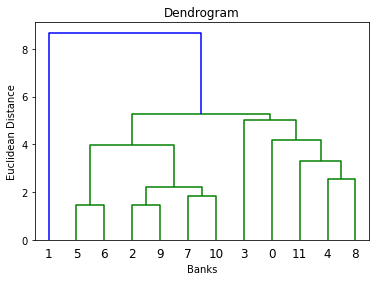

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(df,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Banks')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

In [ ]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')


In [ ]:
hc.fit_predict(df)  #clustering as index to clusters

array([0, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0])

In [ ]:
df['risk'] = hc.labels_

In [ ]:
data['risk'] = hc.labels_

In [ ]:
data

,Bank,ROE,ROA,EPS,NPG,IGR,PEG,PE,OCF,risk
0,Arab Bank,7.72,1.36,1.09,-2.71,4.17,5.10,-2.71,182.14,0
1,ABC Bank,-2.78,-0.38,-0.04,-146.79,-0.60,-2.05,-146.79,-66.76,1
2,Bank of Jordan,8.96,1.34,0.18,-1.34,4.27,0.25,-1.35,-431.41,2
3,Cairo Amman Bank,11.54,1.29,0.21,14.29,6.76,-1.47,8.27,1549.76,0
4,Capital Bank,7.07,0.95,0.10,38.43,8.31,6.94,38.44,-42.19,0
5,Commercial Bank,6.00,0.59,0.07,-20.41,2.17,4.59,-20.41,-70.61,2
6,Jordan Kuwait Bank,3.86,0.63,0.17,-49.10,0.05,4.15,-49.10,338.18,2
7,National Bank,6.23,0.68,0.09,31.20,-0.89,-2.50,26.15,-89.59,2
8,Housing Bank,11.80,1.46,0.39,23.59,3.41,3.25,23.59,75.55,0
9,Arabian Investment Bank,8.08,0.75,0.11,1.05,4.87,0.94,1.05,-81.82,2


In [ ]:
data['risk']= data['risk'].replace(1,'high')
data['risk']= data['risk'].replace(2,'moderate')
data['risk']= data['risk'].replace(0,'low')

In [ ]:
data

,Bank,ROE,ROA,EPS,NPG,IGR,PEG,PE,OCF,risk
0,Arab Bank,7.72,1.36,1.09,-2.71,4.17,5.10,-2.71,182.14,low
1,ABC Bank,-2.78,-0.38,-0.04,-146.79,-0.60,-2.05,-146.79,-66.76,high
2,Bank of Jordan,8.96,1.34,0.18,-1.34,4.27,0.25,-1.35,-431.41,moderate
3,Cairo Amman Bank,11.54,1.29,0.21,14.29,6.76,-1.47,8.27,1549.76,low
4,Capital Bank,7.07,0.95,0.10,38.43,8.31,6.94,38.44,-42.19,low
5,Commercial Bank,6.00,0.59,0.07,-20.41,2.17,4.59,-20.41,-70.61,moderate
6,Jordan Kuwait Bank,3.86,0.63,0.17,-49.10,0.05,4.15,-49.10,338.18,moderate
7,National Bank,6.23,0.68,0.09,31.20,-0.89,-2.50,26.15,-89.59,moderate
8,Housing Bank,11.80,1.46,0.39,23.59,3.41,3.25,23.59,75.55,low
9,Arabian Investment Bank,8.08,0.75,0.11,1.05,4.87,0.94,1.05,-81.82,moderate


In [ ]:
data.to_csv('/content/Final_Bank_data.csv')

In [ ]:
########################################################